# STAT 5820/6820 Final Exam
**Due at 11:59 PM on 2/25/2021**

Please submit this notebook to canvas-->Final exam


### Data from Yelp project

1. user.json


### Q1. Read in user.json into pandas dataframe. (10 points)
1. keep only the following columns:  `['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny','cool', 'elite']`, 'friends', 'fans', 'average_stars' . **hint: use chunksize to read by chunks, for each chunk keep only these columns. (6 jpoints)**
2. Refer to pandas read_json documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html, convert 'yelping_since' into datetime datatype, either when read in json file or convert it after you have read in the file. **(3 points)**
3. Showing how much time it takes to read in the file on your computer. **(1 point)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
%matplotlib inline

In [2]:
import math

In [3]:
%%time 
users = pd.read_json('C:\\Users\\Ben\\Documents\\STAT5820\\data\\yelp_dataset\\user.json',lines=True,chunksize=1000)

Wall time: 17.5 s


In [4]:
%%time
u = []
for chunk in users:
     u.append(chunk[['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny','cool', 'elite','friends','fans','average_stars']])

Wall time: 55 s


In [5]:
users2 = pd.concat(u)

In [6]:
users2.head(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,4.85
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,4.08


In [7]:
users2['yelping_since']=pd.to_datetime(
    users2['yelping_since'],
    infer_datetime_format=True,
    errors='coerce')

In [8]:
users2['yelping_since'].head(5)

0   2013-10-08 23:11:33
1   2013-02-21 22:29:06
2   2013-10-04 00:16:10
3   2014-05-22 15:57:30
4   2013-10-23 07:02:50
Name: yelping_since, dtype: datetime64[ns]

### Q2. Display the data types of all coloumns (1 point)

In [9]:
users2.dtypes

user_id                  object
name                     object
review_count              int64
yelping_since    datetime64[ns]
useful                    int64
funny                     int64
cool                      int64
elite                    object
friends                  object
fans                      int64
average_stars           float64
dtype: object

### Q3. Change the data type of 'review_count','useful','funny','cool','fans' from 'int64' to 'int32'. (4 points)

In [10]:
users2['review_count']=users2['review_count'].astype('int32')

In [11]:
users2['useful']=users2['useful'].astype('int32')

In [12]:
users2['funny']=users2['funny'].astype('int32')

In [13]:
users2['cool']=users2['cool'].astype('int32')

In [14]:
users2['fans']=users2['fans'].astype('int32')

In [15]:
users2.dtypes

user_id                  object
name                     object
review_count              int32
yelping_since    datetime64[ns]
useful                    int32
funny                     int32
cool                      int32
elite                    object
friends                  object
fans                      int32
average_stars           float64
dtype: object

### Q4. Create a new column called 'number_friends' to count the number of friends a user has.  (2 points)

**Hint: you can create a function to count the number of friends and then use .apply() to 'friends' column**

In [16]:
users2['friends'][0]

'c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g, ajcnq75Z5xxkvUSmmJ1bCg, BSMAmp2-wMzCkhTfq9ToNg, jka10dk9ygX76hJG0gfPZQ, dut0e4xvme7QSlesOycHQA, l4l5lBnK356zBua7B-UJ6Q, 0HicMOOs-M_gl2eO-zES4Q, _uI57wL2fLyftrcSFpfSGQ, T4_Qd0YWbC3co6WSMw4vxg, iBRoLWPtWmsI1kdbE9ORSA, xjrUcid6Ymq0DoTJELkYyw, GqadWVzJ6At-vgLzK_SKgA, DvB13VJBmSnbFXBVBsKmDA, vRP9nQkYTeNioDjtxZlVhg, gT0A1iN3eeQ8EMAjJhwQtw, 6yCWjFPtp_AD4x93WAwmnw, 1dKzpNnib-JlViKv8_Gt5g, 3Bv4_JxHXq-gVLOxYMQX0Q, ikQyfu1iViYh8T0us7wiFQ, f1GGltNaB7K5DR1jf3dOmg, tgeFUChlh7v8bZFVl2-hjQ, -9-9oyXlqsMG2he5xIWdLQ, Adj9fBPVJad8vSs-mIP7gw, Ce49RY8CKXVsTifxRYFTsw, M1_7TLi8CbdA89nFLlH4iw, wFsNv-hqbW_F5-IRqfBN6g, 0Q1L7zXHocaUZ2gsG2XJeg, cBFgmOCBdhYa0xoFEAzp_g, VrD_AgiFvzqtlR15vir3SQ, cpE-7HK514Sr5vpSen9CEQ, F1UYelhPFB-zIKlt0ygIZg, CQAL1hvsLMCzuJf9AglsXw, 1KnY1wr15WfEWIRLB9IS6g, QWFQ-kXBiLbid-lm5Jr3dQ, nymT8liFugCrM16lTy0ZfQ, qj69bdd885heDvUPCyHd2Q, DySCZZcgbdrlHgEovk5y9w, lZMJIDuvhT9Dy4KyquLXyA, b_9Gn7wS93AoPZPR0dIJqQ, N07g1IaLh0_6sUjtiSRe4w, YdfPX_7DxSnKvvd

In [17]:
len(users2['friends'].head(1)[0].split(','))

99

In [18]:
def nums(a):
    b = len(a.split(','))
    return(b)

In [19]:
users2['number_friends'] = users2['friends'].apply(nums)

In [20]:
users2['number_friends'][:5]

0      99
1    1152
2      15
3     525
4     231
Name: number_friends, dtype: int64

### Q5. Display the simple statistics of all numberical variables. (2 points) 

In [21]:
users2.dtypes

user_id                   object
name                      object
review_count               int32
yelping_since     datetime64[ns]
useful                     int32
funny                      int32
cool                       int32
elite                     object
friends                   object
fans                       int32
average_stars            float64
number_friends             int64
dtype: object

In [22]:
def stats(a):
    dic = {'Mean': np.mean(a), 'Median': np.median(a), 'STDEV': np.std(a), 'Variance': np.var(a),'SE': np.std(a)/math.sqrt(len(a))}
    return(dic)

In [23]:
stats(users2['number_friends'])

{'Mean': 46.13607038624722,
 'Median': 2.0,
 'STDEV': 137.72383365286635,
 'Variance': 18967.854356042404,
 'SE': 0.10763820792781499}

In [24]:
stats(users2['average_stars'])

{'Mean': 3.6814616727465097,
 'Median': 3.89,
 'STDEV': 1.1510391660147385,
 'Variance': 1.324891161699905,
 'SE': 0.0008995958782038641}

In [25]:
stats(users2['review_count'])

{'Mean': 22.28769779945246,
 'Median': 5.0,
 'STDEV': 76.92234026954466,
 'Variance': 5917.046432543611,
 'SE': 0.0601187364352391}

In [26]:
stats(users2['fans'])

{'Mean': 1.4656455350740134,
 'Median': 0.0,
 'STDEV': 15.683166498164832,
 'Variance': 245.96171140915973,
 'SE': 0.012257195372232329}

In [27]:
stats(users2['cool'])

{'Mean': 21.880460901890984,
 'Median': 0.0,
 'STDEV': 401.9674029851332,
 'Variance': 161577.7930626125,
 'SE': 0.31415804915634576}

In [28]:
stats(users2['funny'])

{'Mean': 17.917845044217408,
 'Median': 0.0,
 'STDEV': 330.3502773188098,
 'Variance': 109131.30572461452,
 'SE': 0.2581856088081189}

In [29]:
stats(users2['useful'])

{'Mean': 40.52769955861998,
 'Median': 3.0,
 'STDEV': 470.241968777382,
 'Variance': 221127.50919962832,
 'SE': 0.3675181082979641}

### Q6. Display users with the 10 most review_counts. (2 points)

In [30]:
HighReviewNum = users2.sort_values(by=['review_count'],ascending=[0]).reset_index(drop=True)

In [31]:
HighReviewNum.head(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,number_friends
0,8k3aO-mPeyhbR5HUucA5aA,Victor,13278,2007-12-08 14:56:45,79512,50899,59766,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","-xt4IBJ-BXo-9Yg9qI0ZLA, augJQotyLB503iq1gVJ_tg...",1125,3.28,5158
1,RtGqdDBvvBCjcu5dUqwfzA,Shila,12390,2010-10-17 06:35:06,9403,3405,2887,"2012,2013,2014,2015,2016,2017,2018","uBDAAXcL3Fmo0YQrwpE9ew, LUHwtIgfclx_9PKfJJQ1YA...",256,3.85,279
2,hWDybu_KvYLSdEFzGrniTw,Bruce,10022,2009-03-08 21:47:44,74829,49785,61383,"2010,2011,2012,2013,2014,2015,2016,2017,2018","QZ3grLRAy7do7inT4OcltQ, 6pbATMd0sGeOJvAEt6znqw...",528,3.61,1833
3,P5bUL3Engv-2z6kKohB6qQ,Kim,9821,2006-05-31 21:27:42,25980,9827,20004,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","gD4815cefTvYc7O6VRWP4g, 3MJI1RDk8aH3ANr7I1AVgA...",746,3.80,3521
4,8RcEwGrFIgkt9WQ35E6SnQ,George,7750,2009-11-06 22:53:16,7973,3822,3143,"2010,2011","o_8sVoYIFnoVun5YY_lAEg, Nrk_KRh141kU_Z-4a31E3A...",282,3.49,968
5,nmdkHL2JKFx55T3nq5VziA,Nijole,7089,2011-11-29 15:50:53,45394,23305,35978,"2012,2013,2014,2015,2016,2017,2018","tipQmXdg181T4NvxrXPjFg, HIzR-HJTESQc35nrVORjsQ...",750,3.70,3832
6,Xwnf20FKuikiHcSpcEbpKQ,Kenneth,6738,2011-06-10 03:52:07,7937,3447,4848,,"GIXfNlfssbAzcB1vXUHjuA, Mln71x70ZKNA7EDxtK9EpQ...",265,3.32,2557
7,Hi10sGSZNxQH3NLyWSZ1oA,Fox,6407,2009-05-26 11:33:58,89418,86122,82128,"2014,2015,2016,2017,2018","2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...",1574,3.83,4542
8,CxDOIDnH8gp9KXzpBHJYXw,Jennifer,6314,2009-11-09 20:44:45,20336,8823,12995,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018","mrru6hbeQLvagU4vkfuqmw, wt0lL3xJIGeJ1r0qO-vkrg...",715,3.32,562
9,HFECrzYDpgbS5EmTBtj2zQ,Eric,5398,2007-03-28 19:08:35,36902,20862,29941,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","X4yDntO5EhsRVYZraEvc-g, jAYP7ALlgpYfJCjGqvMPMQ...",410,3.93,3105


### Q7. Create a new column called 'funness' that is the percentage of 'funny' votes to the 'review_count'. (2 points)

For example, a user has 13278 review_count and 50899 funny votes, so his/her funnes is 50899/13278 = 3.83

In [32]:
def percentage(a,b):
    c = a/b
    return(c)

In [33]:
users2['funness'] = percentage(users2['funny'],users2['review_count'])

In [34]:
users2.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,number_friends,funness
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03,99,0.178947
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63,1152,0.666667
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71,15,0.500000


### Q8. Display the users with 10 most funness. (1 point)

In [35]:
HighFunness = users2.sort_values(by=['funness'],ascending=[0]).reset_index(drop=True)

In [36]:
HighFunness.head(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,number_friends,funness
0,AbbeFj9SPxOoHNKkeDVn6w,Janet,0,2017-07-11 06:37:38,0,2,0,,"fwwZK_bVBK-0ovQU8XCKBQ, sNg-Qhpns7km7N6BdjFNNw...",0,1.00,25,inf
1,qiTy11I-yp6foxIghRfGOA,Joel,1,2008-09-02 16:59:42,2828,1424,1085,"2009,2010,2011,2012","oYWILlXqqbUd5M6AyhQ2Yw, oX9fh4dAnVh7vGjdIUg5Ag...",128,3.56,612,1424.000000
2,cyYQqWEhGJ6Mrvyry5Vn3w,Bae Sung,1,2016-07-15 19:22:45,19,681,13,,None,0,3.80,1,681.000000
3,Nv2a__EFAR9Ds9QZkInuiw,Jerry,1,2017-02-19 02:24:17,1,256,0,,"6lCfXieOzia4DUrJDlgFqA, QxtlhFjJfmwWi8yUzILHNw...",0,5.00,130,256.000000
4,HMF3GtYL9aa01DEHm6ww7Q,Sherry,2,2011-02-24 23:12:55,11,455,5,,"f4W09vMVBWyz0cxWFg4EWg, wHAxtj5Gbk9xywIJRrzcKQ...",1,5.00,15,227.500000
5,wuYbmgHqquyjjG3X4BYOeA,Angee,4,2012-11-18 19:36:27,19,803,11,,"fYKjwhrzicBJ0iuv-0CiXQ, zQ0OiJkQwnevOYjuNLBPdw...",1,5.00,27,200.750000
6,aTEViTVYQ18VOEPwEvB2fw,Sara,1,2012-08-16 13:33:56,0,167,0,,"JBiXVe_Yk5KMyfkO1_FnaA, oJBCFfMObSWMh8kmOTPkJg...",0,5.00,30,167.000000
7,_I-lWD9NXCV5kf8cpabX6A,Julie,1,2015-05-04 15:26:49,0,148,0,,None,0,5.00,1,148.000000
8,xgwsA1Z3TjfQsk8lRppiVA,Andrew,14,2016-02-12 17:46:46,60,1977,50,,"RxbaGs7ltjKtl-smnh-yxg, X489FenmpoYZAXFwsLo0PQ...",2,3.16,12,141.214286
9,H5dkC0OmZkRDTFjN4nrMxw,Nik,7,2011-06-26 05:51:17,1877,983,639,,"9H8g1I14siAwaPJCEfbd1A, o45RZ4Ptm0F2hHKA6OVDEg...",8,3.18,10,140.428571


## Data Visualization

### Q9. Visualize the number of users joined Yelp by year. (6 points)

Choose whatever chart you feel appropriate.

**Hint: use 'yelping_since' and  `.dt.year`**

In [37]:
users2['yelping_since'].dt.year

0          2013
1          2013
2          2013
3          2014
4          2013
           ... 
1637133    2016
1637134    2017
1637135    2009
1637136    2018
1637137    2016
Name: yelping_since, Length: 1637138, dtype: int64

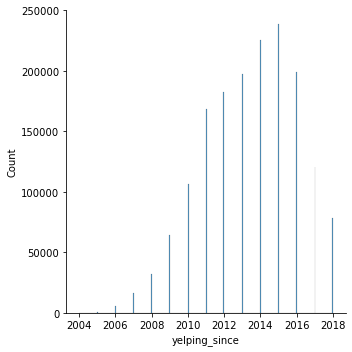

In [38]:
sns.displot(users2['yelping_since'].dt.year)

### Q10. Display histograms of the following columns: `['review_count', 'useful', 'funny','cool', 'fans', 'average_stars','number_friends']` (6 points)

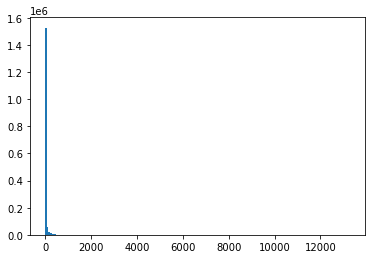

In [39]:
plt.hist(users2['review_count'],bins = 200)
plt.show()

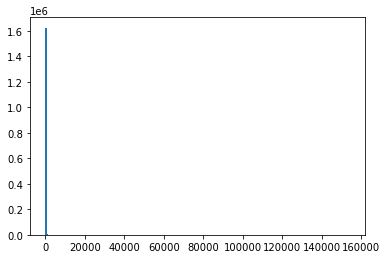

In [40]:
plt.hist(users2['useful'],bins = 200)
plt.show()

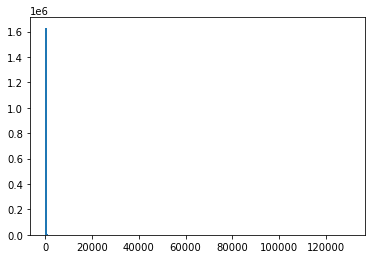

In [41]:
plt.hist(users2['funny'],bins = 200)
plt.show()

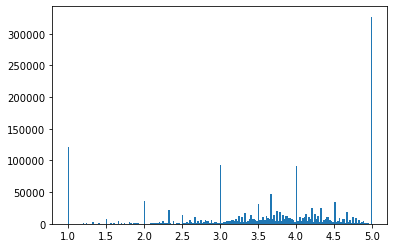

In [42]:
plt.hist(users2['average_stars'],bins = 200)
plt.show()

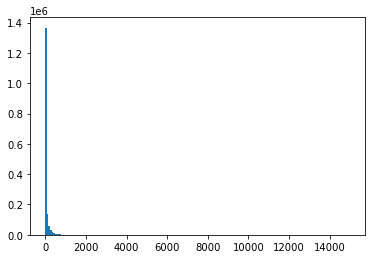

In [43]:
plt.hist(users2['number_friends'],bins = 200)
plt.show()

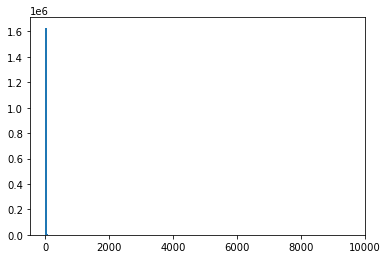

In [44]:
plt.hist(users2['fans'],bins = 200)
plt.show()

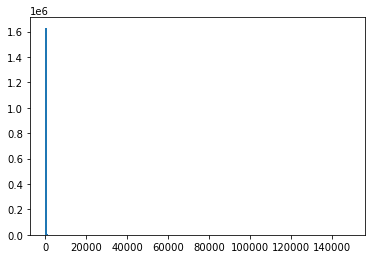

In [45]:
plt.hist(users2['cool'],bins = 200)
plt.show()

### Q11. Display a heatmap of variable correlations (4 points)

<AxesSubplot:>

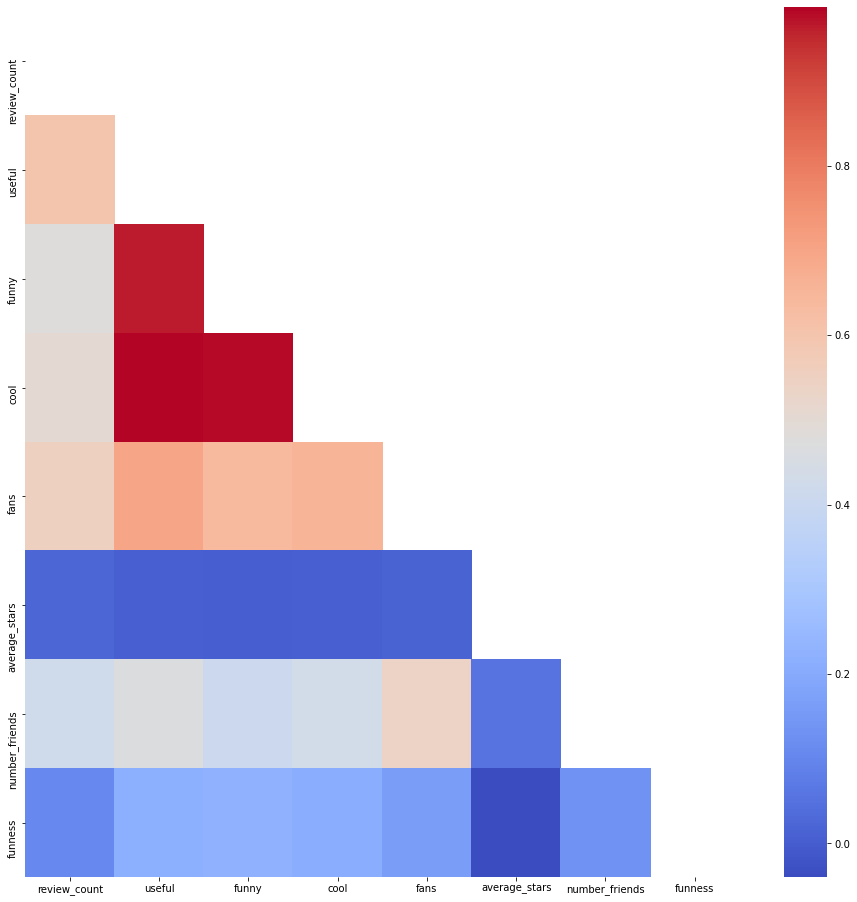

In [46]:
corr = users2.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(corr)] = True
plt.figure(figsize=(16,16))
sns.heatmap(corr,cmap = "coolwarm",mask=mask)